In [ ]:
#importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

batch_size=64
epoch_size=64

58889256/58889256 [==============================] - 1s 0us/step


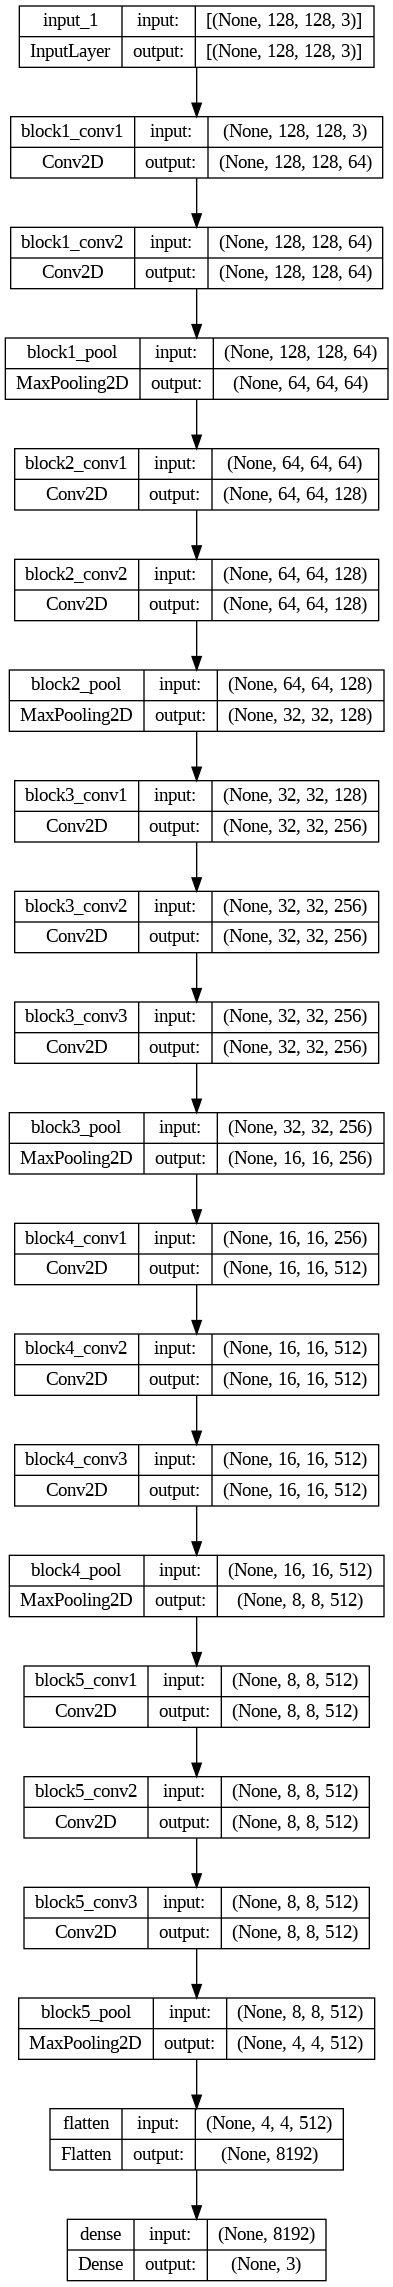

In [ ]:
#transfer learning and pretained vgg and replace its head
vgg=tf.keras.applications.VGG16(input_shape=[128,128,3],include_top=False,weights='imagenet')
x=Flatten()(vgg.output)
x=Dense(3,activation='sigmoid')(x)
model1=Model(vgg.input,x)
model1.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001))
#plot the model
plot_model(model1,'first_model.png',show_shapes=True,expand_nested=False)

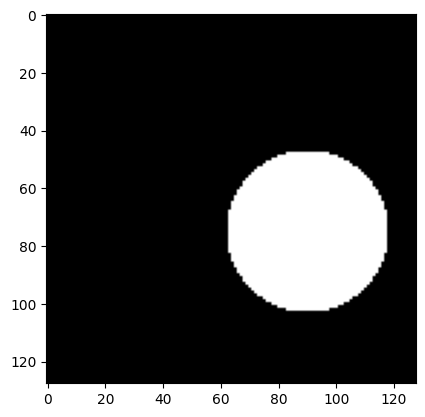

In [ ]:
#Creating the circle generator
from matplotlib.patches import Circle
#enabling infinite amount of bathes
def synthetic_gen(batch_size=64):
    while True:
        #generating black image in the expected size
        X=np.zeros((batch_size,128,128,3))
        Y=np.zeros((batch_size,3))
        #fill each image
        for i in range(batch_size):
            x=np.random.randint(8,120)
            y=np.random.randint(8,120)
            a=min(128-max(x,y),min(x,y))
            r=np.random.randint(4,a)
            for x_i in range(128):
                for y_i in range(128):
                    if ((x-x_i)**2) + ((y-y_i)**2) < r**2:
                        X[i,x_i,y_i,:]=1

            Y[i,0]=(x-r)/128.
            Y[i,1]=(y-r)/128.
            Y[i,2]=2*r/128.
        yield X,Y

#plot the image
x,y=next(synthetic_gen())
plt.imshow(x[0])

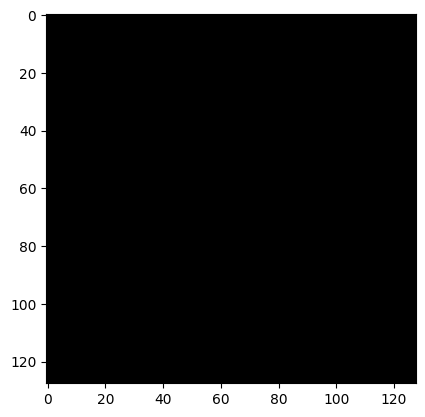

In [ ]:
def excellent():
    X=np.zeros((64,128,128,3))
    Y=np.zeros((64,3))
    return X,Y
x,y=excellent()
plt.imshow(x[0])
plt.show()

In [ ]:
#needs the steps per epochs since the generator is infinite
model1.fit(x=synthetic_gen(),steps_per_epoch=epoch_size,epochs=5)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 1693s 26s/step - loss: 0.7297
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 22400s 355s/step - loss: 0.4996
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 1676s 26s/step - loss: 0.4912
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 1652s 26s/step - loss: 0.4903
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 1648s 26s/step - loss: 0.4905


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step


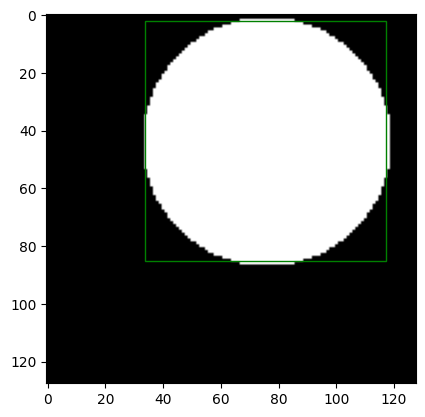

In [ ]:
#plot the given image and plot image.rectangle
from matplotlib.patches import Rectangle
def plot_pred(img,p):
    fig,ax=plt.subplots(1)
    ax.imshow(img)
    rect=Rectangle(xy=(p[1]*128,p[0]*128),width=p[2]*128,height=p[2]*128,linewidth=1,facecolor='none',edgecolor='g')
    ax.add_patch(rect)
    plt.show()

#generate new image
x,_=next(synthetic_gen())
#predict
pred=model1.predict(x)
#examine 1 image
im=x[0]
p=pred[0]
plot_pred(im,p)

<function matplotlib.pyplot.show(close=None, block=None)>

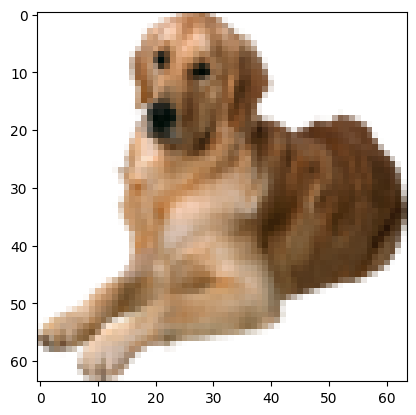

In [ ]:
#importing an image
from PIL import Image
dog_im=Image.open('dog.png')
dog_im=dog_im.resize((64,64))
dog=np.asarray(dog_im)
plt.imshow(dog)
plt.show

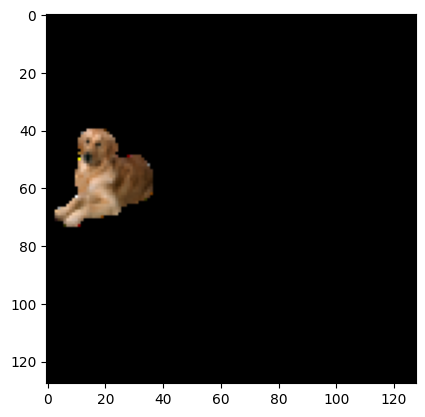

In [ ]:
#generating dog image in black background
def dog_gen(batch_size=64):
    while True:
        #generating the black background
        X=np.zeros((batch_size,128,128,3))
        Y=np.zeros((batch_size,3))
        #fill each image
        for i in range(batch_size):
            size=np.random.randint(32,64)
            temp_dog=dog_im.resize((size,size))
            dog=np.asarray(temp_dog)/255.
            dog_x,dog_y,_=dog.shape
            bg=Image.new('RGB',(128,128))

            x1=np.random.randint(1,128 -dog_x)
            y1=np.random.randint(1,128 - dog_y)
            weight=dog_y
            height=dog_x

            bg.paste(temp_dog,(x1,y1))
            dog=np.asarray(bg)/255.
            X[i]=dog

            Y[i,0]=x1/128.
            Y[i,1]=y1/128.
            Y[i,2]=dog_x/128.
        yield X,Y

#plotting the image
x,y=next(dog_gen())
plt.imshow(x[0])
plt.show()

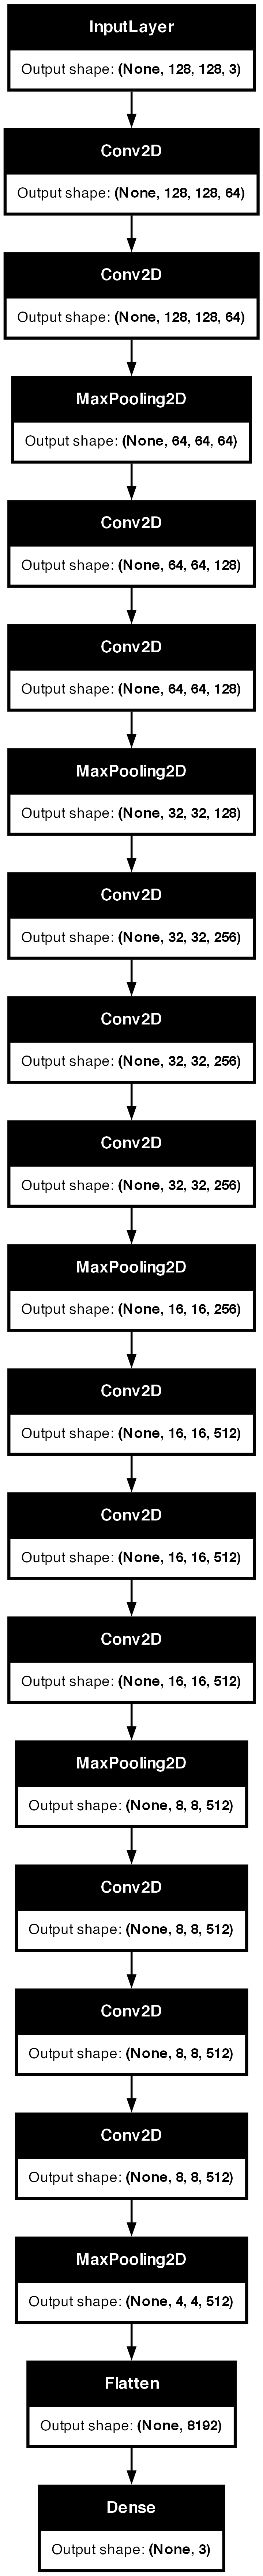

In [ ]:
#creating the pretained model VGG16 and replacing its head
vgg_dog=tf.keras.applications.VGG16(input_shape=[128,128,3],include_top=False,weights='imagenet')
x=Flatten()(vgg_dog.output)
x=Dense(3,activation='sigmoid')(x)
model2=Model(vgg_dog.input,x)
model2.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001))
plot_model(model2,'second_model.png',show_shapes=True)

In [ ]:
#fitting the model and steps_per_epoch must be fixed otherwise it will continously fitting
model2.fit(x=dog_gen(),steps_per_epoch=epoch_size,epochs=5)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 1628s 25s/step - loss: 1.1402
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 1704s 27s/step - loss: 0.5813
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 2090s 33s/step - loss: 0.5784
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 2087s 32s/step - loss: 0.5717
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 2376s 37s/step - loss: 0.5738


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step


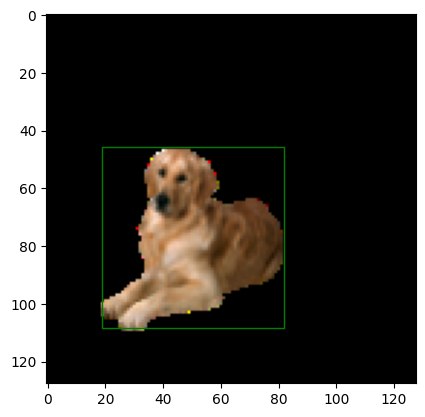

In [ ]:
#generating the recangle box around the dog photo
from matplotlib.patches import Rectangle

def plot_pred_dog(img,p):
    fig,ax=plt.subplots(1)
    ax.imshow(img)
    rect=Rectangle(xy=(p[0]*128,p[1]*128),height=p[2]*128,width=p[2]*128,edgecolor='g',linewidth=1,facecolor='none')
    ax.add_patch(rect)
    plt.show()

#generate new image
x,_=next(dog_gen())
#predict
pred=model2.predict(x)

im=x[0]
p=pred[0]
plot_pred_dog(im,p)

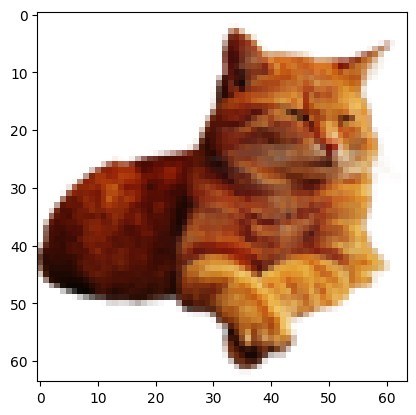

In [ ]:
#importing image
from PIL import Image
cat=Image.open('/content/cat.png')
cat=cat.resize((64,64))
cat_im=np.asarray(cat)
plt.imshow(cat_im)
plt.show()

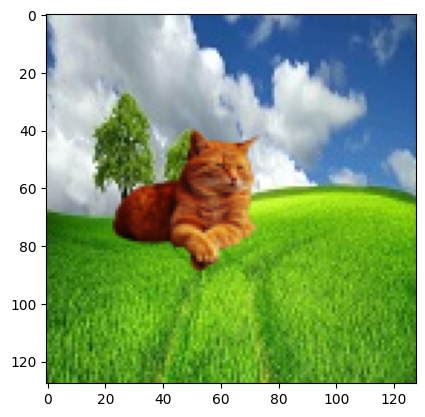

In [ ]:
#Creating a black image and make a rectangle
def cat_gen(batch_size=64):
    while True:
        #generating the black image
        X=np.zeros((batch_size,128,128,3))
        Y=np.zeros((batch_size,3))
        #fill each image by cat
        for i in range(batch_size):
            size=np.random.randint(32,64)
            cat=Image.open('/content/cat.png')
            cat_temp=cat.resize((size,size))
            cat=np.asarray(cat_temp)/255.
            cat_x,cat_y,_=cat.shape

            #background image
            bg_link=f'/content/bg{np.random.randint(1,4)}.jpg'
            bg=Image.open(bg_link)

            x1=np.random.randint(1,128-cat_x)
            y1=np.random.randint(1,128-cat_y)
            h=cat_x
            w=cat_y

            bg.paste(cat_temp,(x1,y1),mask=cat_temp)
            cat=np.asarray(bg)/255.
            X[i]=cat

            Y[i,0]=x1/128.
            Y[i,1]=y1/128.
            Y[i,2]=h/128.

        yield X,Y

#sanity check and plot the image
x,y=next(cat_gen())
plt.imshow(x[0])
plt.show()

58889256/58889256 [==============================] - 0s 0us/step


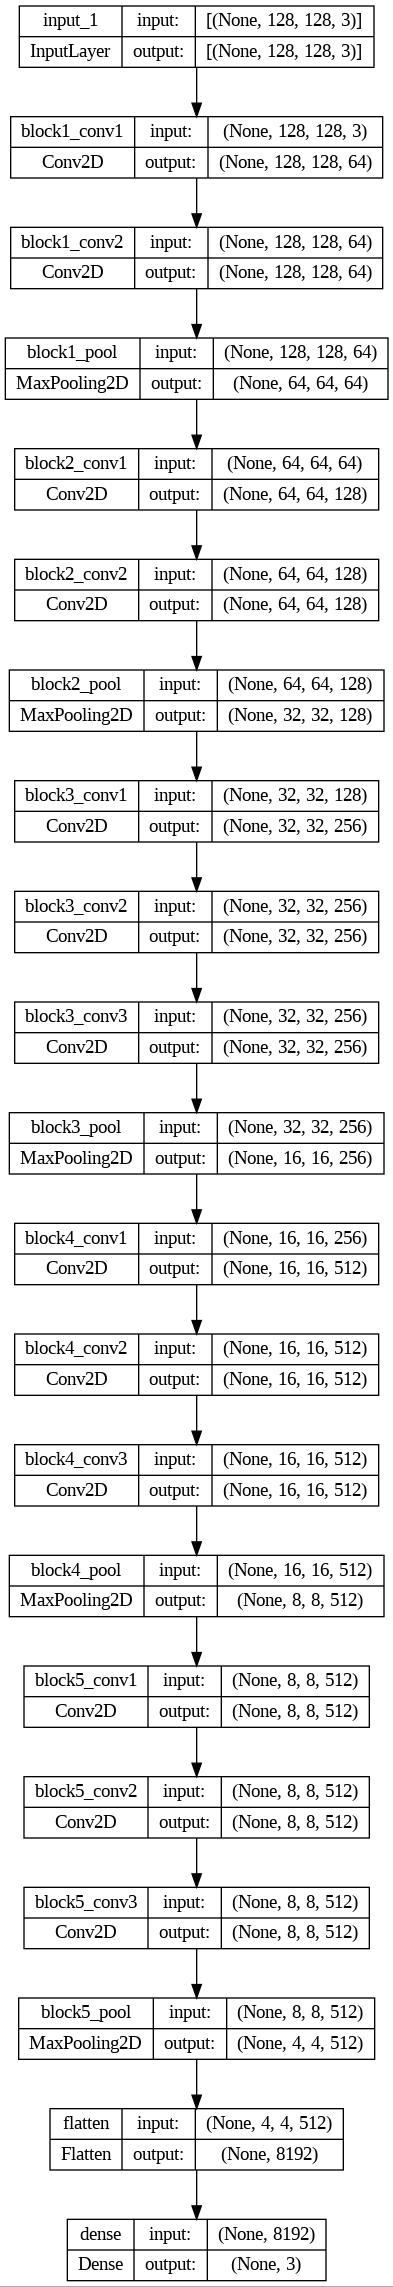

In [ ]:
#creating the model using pretained vgg16 model without its head
vgg_cat=tf.keras.applications.VGG16(input_shape=[128,128,3],weights='imagenet',include_top=False)
a=Flatten()(vgg_cat.output)
a=Dense(3,activation='sigmoid')(a)
model3=Model(vgg_cat.input,a)
model3.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001))
#plotting the model
plot_model(model3,'third_model.jpg',show_shapes=True)

In [ ]:
#You have to select steps per epoch. otherwise it will do unstoppable iteration
model3.fit(cat_gen(),steps_per_epoch=batch_size,epochs=5)

Epoch 1/5
64/64 [==============================] - 108s 1s/step - loss: 0.7594
Epoch 2/5
64/64 [==============================] - 89s 1s/step - loss: 0.5814
Epoch 3/5
64/64 [==============================] - 89s 1s/step - loss: 0.5717
Epoch 4/5
64/64 [==============================] - 89s 1s/step - loss: 0.5736
Epoch 5/5
64/64 [==============================] - 88s 1s/step - loss: 0.5761


2/2 [==============================] - 0s 54ms/step


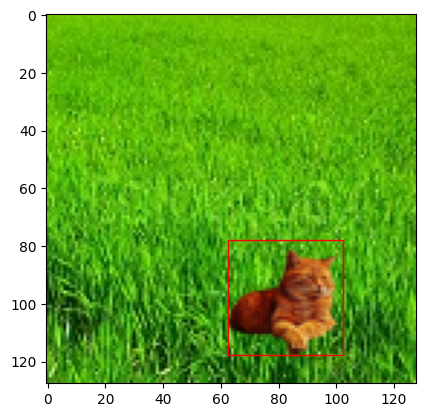

In [ ]:
#plotting the rectangle box round the cat
from matplotlib.patches import Rectangle

def prediction_plot(im,p):
    fig,ax=plt.subplots(1)
    ax.imshow(im)
    rect=Rectangle(xy=(p[0]*128,p[1]*128),height=p[2]*128,width=p[2]*128,edgecolor='r',facecolor='none',linewidth=1)
    ax.add_patch(rect)
    plt.show()

#generate the image
x,_=next(cat_gen())
#predict
pred=model3.predict(x)

im=x[0]
p=pred[0]
prediction_plot(im,p)